###  1. Import Libraries

This cell imports all the libraries we need.
We import os, re, pandas, and matplotlib to load files, clean text, analyze it, and create plots.

In [1]:

import os
from pathlib import Path
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


### 2 . Point to the TXT folder
This cell sets the path to the TXT folder and lists all text files.
It checks whether the folder exists, counts how many .txt contracts are present, and prints a few file names.
This helps us confirm that the dataset is loaded correctly.

In [4]:

TEXT_DIR = Path("CUAD_v1/full_contract_txt")

# Check that folder exists
print("TXT folder exists:", TEXT_DIR.exists())

# List all txt files
txt_files = sorted(TEXT_DIR.glob("*.txt"))
print(f"Number of TXT files found: {len(txt_files)}")

# Show first 5 file names
for p in txt_files[:5]:
    print("-", p.name)


TXT folder exists: True
Number of TXT files found: 510
- 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt
- ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEMENT.txt
- ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-EX-10.13-JOINT VENTURE AGREEMENT.txt
- ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGREEMENT.txt
- ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT AGREEMENT.txt


### 3.Load all TXT files into DataFrame

This cell reads every TXT file into a pandas DataFrame.

For each contract:

we open the file

read the text

store the filename and text in a table
This creates a dataset we can work with for preprocessing and EDA.

In [5]:

def read_file(path: Path) -> str:
    """Read a text file safely."""
    try:
        return path.read_text(encoding="utf-8", errors="ignore")
    except Exception as e:
        print(f"Error reading {path.name}: {e}")
        return ""

data = []

for path in txt_files:
    text = read_file(path)
    data.append({
        "file_name": path.name,
        "text": text
    })

df = pd.DataFrame(data)
print(df.shape)
df.head()


(510, 2)


,file_name,text
0,2ThemartComInc_19990826_10-12G_EX-10.10_670028...,CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...
1,ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...,EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...
2,ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...,EXHIBIT 10.13\n\n ...
3,ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...,Exhibit 10.31 PURSUANT TO 17 C.F.R. § 240.2...
4,ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...,REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...


### 4.Basic EDA - Length statistics

This cell calculates basic statistics for each contract.
We count:

number of characters

number of words (tokens)

This helps us understand how long and complex each contract is.
We also find the shortest and longest contracts.

In [6]:


def simple_tokenize(text: str):
    # Very simple tokenization: split on whitespace
    return text.split()

df["n_chars"] = df["text"].str.len()
df["n_tokens"] = df["text"].apply(lambda t: len(simple_tokenize(t)))

print("Number of contracts:", len(df))
print("Average characters per contract:", df["n_chars"].mean())
print("Average tokens per contract:", df["n_tokens"].mean())

print("\nShortest 3 contracts (by tokens):")
display(df[["file_name", "n_tokens"]].sort_values("n_tokens").head(3))

print("\nLongest 3 contracts (by tokens):")
display(df[["file_name", "n_tokens"]].sort_values("n_tokens", ascending=False).head(3))


Number of contracts: 510
Average characters per contract: 52563.00588235294
Average tokens per contract: 7861.1882352941175

Shortest 3 contracts (by tokens):


,file_name,n_tokens
385,RMRGROUPINC_01_22_2020-EX-99.1-JOINT FILING AG...,109
340,PcquoteComInc_19990721_S-1A_EX-10.11_6377149_E...,123
359,"PRECIGEN,INC_01_22_2020-EX-99.1-JOINT FILING A...",145



Longest 3 contracts (by tokens):


,file_name,n_tokens
177,"GOOSEHEADINSURANCE,INC_04_02_2018-EX-10.6-Fran...",47733
350,PhasebioPharmaceuticalsInc_20200330_10-K_EX-10...,45650
89,"CERES,INC_01_25_2012-EX-10.20-Collaboration Ag...",45577


### 5.  Plot token-length distribution

This cell plots a histogram of contract lengths.
It shows how the word counts are distributed across all contracts.

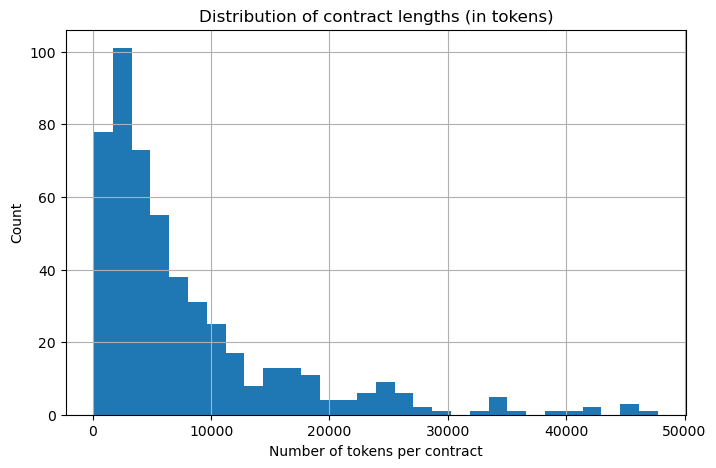

In [7]:

plt.figure(figsize=(8, 5))
df["n_tokens"].hist(bins=30)
plt.xlabel("Number of tokens per contract")
plt.ylabel("Count")
plt.title("Distribution of contract lengths (in tokens)")
plt.show()


### 6. Explore One Random Sample Contract

This cell picks a random contract file and shows us what's inside.
We look at the beginning and end of the contract to understand its structure and content.
This gives us a better variety in exploring different types of contracts each time we run it.

In [8]:

import random

if txt_files:
    sample_file = random.choice(txt_files)  # Get a random contract file
    sample_text = read_file(sample_file)
    
    print("Sample contract file:", sample_file.name)
    print("File size (characters):", len(sample_text))
    print("\nFirst 1000 characters:\n")
    print(sample_text[:1000])
    print("\n" + "="*50)
    print("Last 500 characters:\n")
    print(sample_text[-500:])
else:
    print("No contract files found!")


Sample contract file: MFAFINANCIAL,INC_07_06_2020-EX-99.D-JOINT FILING AGREEMENT.txt
File size (characters): 3595

First 1000 characters:

EXHIBIT D JOINT FILING AGREEMENT MFA FINANCIAL, INC. In accordance with Rule 13d-1(k) under the Securities Exchange Act of 1934, as amended, the undersigned hereby confirm the agreement by and among them to the joint filing on behalf of them of the Statement on Schedule 13D and any and all further amendments thereto, with respect to the securities of the above referenced issuer, and that this Agreement be included as an Exhibit to such filing. This Agreement may be executed in any number of counterparts each of which shall be deemed to be an original and all of which together shall be deemed to constitute one and the same Agreement. IN WITNESS WHEREOF, the undersigned hereby execute this Agreement as of July 6, 2020. ATHENE ANNUITY AND LIFE COMPANY By: Apollo Insurance Solutions Group LP, its investment adviser By: AISG GP Ltd., its general partner 

### 7.Basic text cleaning / preprocessing

This cell cleans the text for preprocessing.
It performs basic cleaning steps:

lowercasing the text

removing extra spaces and newlines

removing unwanted characters
It also shows before and after cleaning for one example contract

In [9]:

def clean_text(text: str) -> str:
    
    # Lowercase
    text = text.lower()
    
    # Replace multiple whitespace with single space
    text = re.sub(r"\s+", " ", text)
    
    #removing special characters
    text = re.sub(r"[^a-z0-9\.\,\-\;\:\(\)/ ]", " ", text)
    
    # Again remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

df["clean_text"] = df["text"].apply(clean_text)

# Show original vs cleaned for one example contract
i = 0  # index of contract to inspect
print("File:", df.loc[i, "file_name"])
print("\n--- ORIGINAL (first 600 chars) ---\n")
print(df.loc[i, "text"][:600])
print("\n--- CLEANED (first 600 chars) ---\n")
print(df.loc[i, "clean_text"][:600])


File: 2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt

--- ORIGINAL (first 600 chars) ---

CO-BRANDING AND ADVERTISING AGREEMENT

THIS CO-BRANDING AND ADVERTISING AGREEMENT (the "Agreement") is made as of June 21, 1999 (the "Effective Date") by and between I-ESCROW, INC., with its principal place of business at 1730 S. Amphlett Blvd., Suite 233, San Mateo, California 94402 ("i-Escrow"), and 2THEMART.COM, INC. having its principal place of business at 18301 Von Karman Avenue, 7th Floor, Irvine, California 92612 ("2TheMart").

1. DEFINITIONS.

(a) "CONTENT" means all content or information, in any medium, provided by a party to the other party for use in conjunction with the performan

--- CLEANED (first 600 chars) ---

co-branding and advertising agreement this co-branding and advertising agreement (the agreement ) is made as of june 21, 1999 (the effective date ) by and between i-escrow, inc., with its principal place of business at 

### 8. EDA on cleaned text length distribution

This cell performs word frequency analysis on the cleaned text.
We:

tokenize all words

build a vocabulary

find the top 30 most common words in all contracts

In [10]:


# Create tokens from cleaned text
df["clean_tokens"] = df["clean_text"].apply(lambda t: t.split())

# Total vocabulary size
all_tokens = [token for tokens in df["clean_tokens"] for token in tokens]
vocab = set(all_tokens)
print("Total tokens in corpus:", len(all_tokens))
print("Vocabulary size (unique words):", len(vocab))

# Most common words
counter = Counter(all_tokens)
print("\nTop 30 most common words:")
for word, freq in counter.most_common(30):
    print(f"{word}: {freq}")


Total tokens in corpus: 4021864
Vocabulary size (unique words): 77804

Top 30 most common words:
the: 254112
of: 154519
to: 127155
and: 127133
or: 102725
in: 79236
any: 61516
shall: 47829
a: 43294
by: 42344
this: 39837
be: 39104
for: 38207
such: 35812
with: 33100
as: 31317
party: 27955
agreement: 27134
that: 26299
other: 25506
is: 21806
all: 21802
not: 20459
its: 19681
s: 19277
will: 18859
on: 16701
under: 13988
at: 13063
may: 12983


In [11]:

# Save file_name + clean_text to a CSV for later modeling
output_path = "contracts_clean_text.csv"
df[["file_name", "clean_text"]].to_csv(output_path, index=False)
print("Saved cleaned text to:", output_path)


Saved cleaned text to: contracts_clean_text.csv


### 9. View the Saved CSV File

This cell loads and displays the saved cleaned text CSV file to verify it was saved correctly.

In [ ]:
# Load and view the saved CSV file
if os.path.exists("contracts_clean_text.csv"):
    saved_df = pd.read_csv("contracts_clean_text.csv")
    print("CSV file loaded successfully!")
    print(f"Shape: {saved_df.shape}")
    print("\nFirst 5 rows:")
    display(saved_df.head())
    
    print("\nSample of cleaned text from first contract:")
    print(saved_df.loc[0, "clean_text"][:500] + "...")
else:
    print("CSV file not found. Make sure to run the previous cell first.")